Necessary imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import numpy as np
import pandas as pd

# P8.1
Prepare a code which draw for given network plot of the relation $C(k).$

In [2]:
def plot_k_clustering_coefficient(G: nx.Graph):
    def average_degree(G: nx.Graph, k: int): 
        degrees = dict(G.degree)
        nodes_with_k = [n for n, v in degrees.items() if v == k]
        averages = np.array([np.sum([degrees[i] for i in G.neighbors(node)]) / k for node in nodes_with_k])

        return np.mean(averages)
    X = np.unique(list(dict(G.degree).values()))
    Y = [average_degree(G, x) for x in X]
    
    plt.plot(X, Y)
    plt.ylim(0, max(Y) * 1.25)

# P8.2

Find examples of hierarchical and non-hierarchical networks in
available repositories, check by drawing graphs from the task __P8.1__.

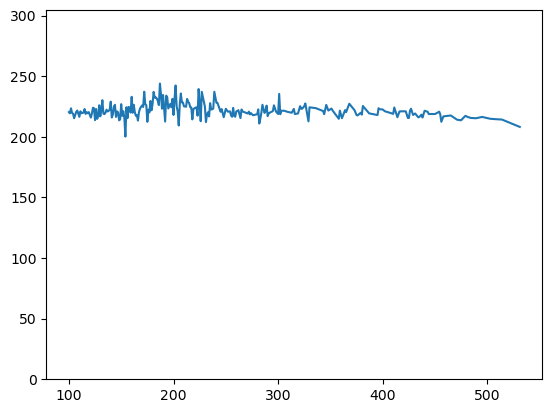

In [9]:
# Test
N = 100
M = 1000
G = nx.generators.barabasi_albert_graph(M, N)
plot_k_clustering_coefficient(G)

In [10]:
from networkx.drawing.nx_pydot import graphviz_layout

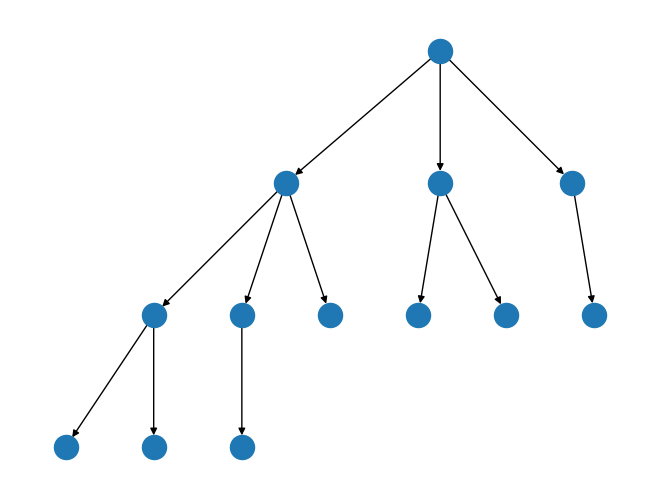

In [11]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9),
                  (4,10), (5,11), (5,12), (6,13)])
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos)
plt.show()

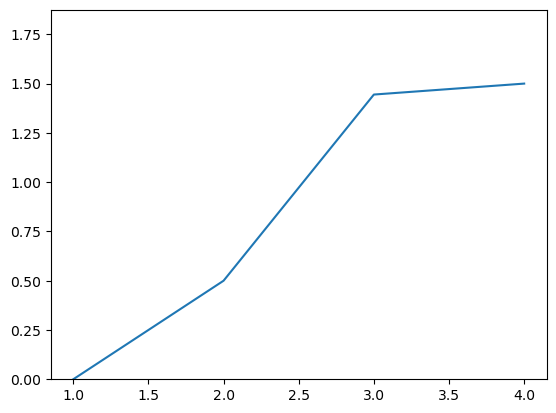

In [12]:
plot_k_clustering_coefficient(G)

# P8.3

I run collector and parser implemented by Elzbieta Jowik.

https://www.ztm.waw.pl/wp-content/uploads/2014/04/1200_zasady.pdf

In [13]:
import json

In [14]:
points = json.load(open("./ztm_collector/data/points.json", 'r'))
routes = json.load(open("./ztm_collector/data/routes_sun_1.json", 'r'))

In [15]:
points

{'100101': {'lon': 21.044827,
  'lat': 52.248455,
  'routes': {'100102': 1,
   '100103': 2,
   '200105': 2,
   '100108': 3,
   '100188': 3,
   '100106': 3,
   '100107': 3,
   '123101': 3,
   '200101': 3,
   '123102': 4,
   '123112': 4,
   '200107': 4,
   '200102': 5,
   '290102': 5,
   '123111': 5,
   '200103': 5,
   '100104': 5,
   '200106': 5,
   '200104': 6,
   '200109': 6,
   '103202': 8,
   '103201': 8,
   '200201': 9,
   '102815': 9,
   '102801': 9,
   '123107': 9,
   '123204': 9,
   '102811': 9,
   '102813': 10,
   '100201': 10,
   '100202': 10,
   '100203': 10,
   '103302': 10,
   '102805': 10,
   '102802': 10,
   '123103': 10,
   '200206': 10,
   '100204': 11,
   '200203': 11,
   '212001': 11,
   '212004': 11,
   '102807': 11,
   '102804': 11,
   '123201': 11,
   '123202': 11,
   '102808': 12,
   '212003': 12,
   '102806': 12,
   '102803': 12,
   '212006': 12,
   '200204': 12,
   '239902': 12,
   '239901': 12,
   '130502': 12,
   '123203': 12,
   '290001': 12}},
 '100102': {'l

In [16]:
routes

{'100101': {'200101': [[73, 0],
   [73, 0],
   [99, 0],
   [99, 0],
   [131, 0],
   [131, 0],
   [161, 0],
   [161, 0]],
  '200104': [[64, 1],
   [85, 1],
   [89, 1],
   [115, 1],
   [124, 1],
   [145, 1],
   [149, 1],
   [175, 1]]},
 '100102': {'100202': [[107, 1], [167, 1]]},
 '100107': {'100202': [[63, 1],
   [76, 1],
   [76, 1],
   [78, 1],
   [92, 1],
   [106, 1],
   [106, 1],
   [122, 1],
   [136, 1],
   [136, 1],
   [138, 1],
   [152, 1],
   [166, 1],
   [166, 1]]},
 '100108': {'102806': [[60, 1],
   [70, 1],
   [70, 1],
   [81, 1],
   [96, 1],
   [96, 1],
   [111, 1],
   [120, 1],
   [128, 1],
   [128, 1],
   [141, 1],
   [158, 1],
   [158, 1],
   [171, 1],
   [180, 1]]},
 '100188': {'102804': [[72, 1],
   [72, 1],
   [74, 1],
   [88, 1],
   [102, 1],
   [102, 1],
   [118, 1],
   [132, 1],
   [132, 1],
   [134, 1],
   [148, 1],
   [162, 1],
   [162, 1],
   [178, 1]]},
 '100201': {'100108': [[69, 2],
   [69, 2],
   [80, 2],
   [95, 2],
   [95, 2],
   [110, 2],
   [119, 2],
   [1

In [18]:
points_dict = {k: (v['lon'], v['lat']) for k, v in points.items()}

In [17]:
# appending edges to points
edges = []

for k, v in routes.items():
    for end_point in v.keys():
        edges.append((k, end_point))
len(edges)

2286

In [19]:
G = nx.from_edgelist(edges)

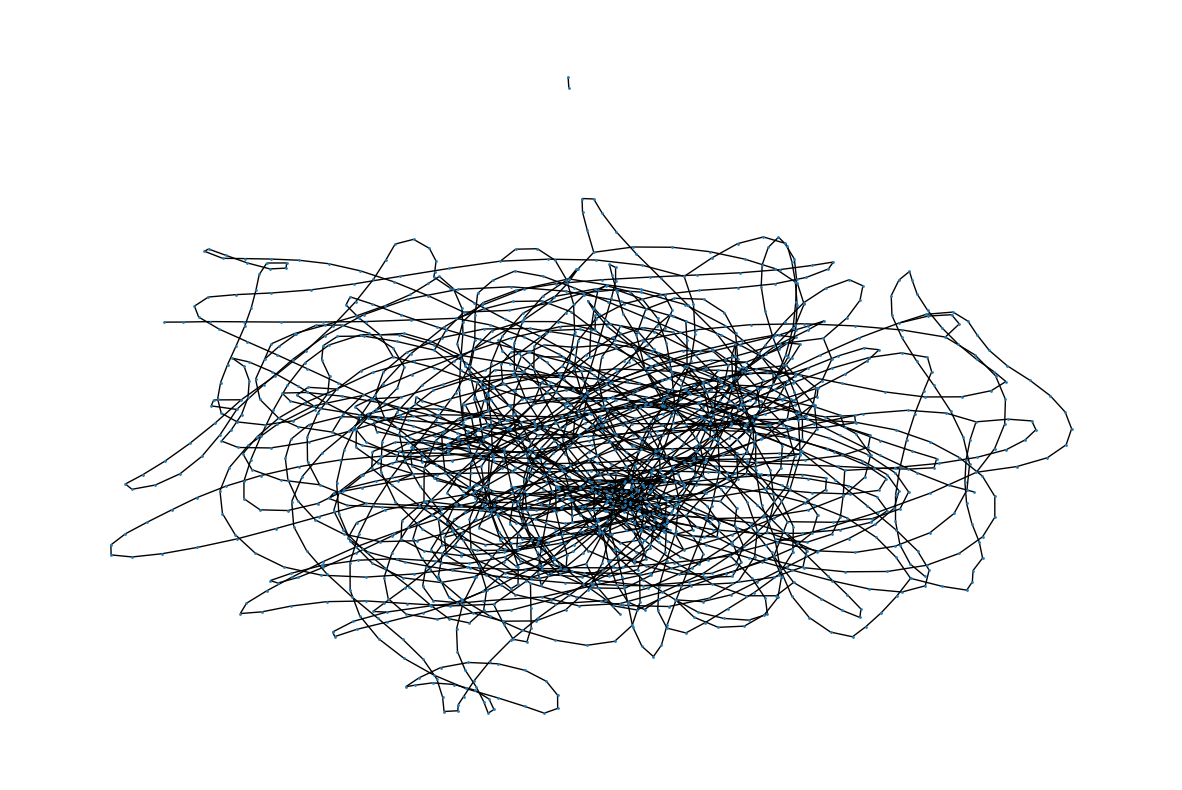

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
nx.draw_spring(G, node_size=1, ax=ax )

# P8.4

Calculate the basic characteristics of each layer, and the whole
network.

In [21]:
def calculate_MLE(data):
    return 1 + len(data) / (np.sum(np.log(data / np.min(data))))

In [22]:
def calculate_metrics(G: nx.Graph, name: str, directed: bool):
    degree_sequence = sorted([d for _, d in G.degree()], reverse=True)
    return {
        'name': name,
        'directed': directed,
        'N': len(G.nodes),
        'E': len(G.edges),
        '<k>': np.mean(degree_sequence),
        'alpha': calculate_MLE(degree_sequence),
        # 'l': nx.average_shortest_path_length(nx.subgraph(G, max(nx.connected_components(G), key=len))),
        'r': nx.degree_pearson_correlation_coefficient(G)
    }

In [23]:
pd.DataFrame([calculate_metrics(G, "whole_network", True)])

,name,directed,N,E,<k>,alpha,r
0,whole_network,True,2085,2286,2.192806,2.312828,0.230311


# P8.5

Translate GPS coordinates to configuration of the vertices and
draw graph in proper, geographic, configuration.

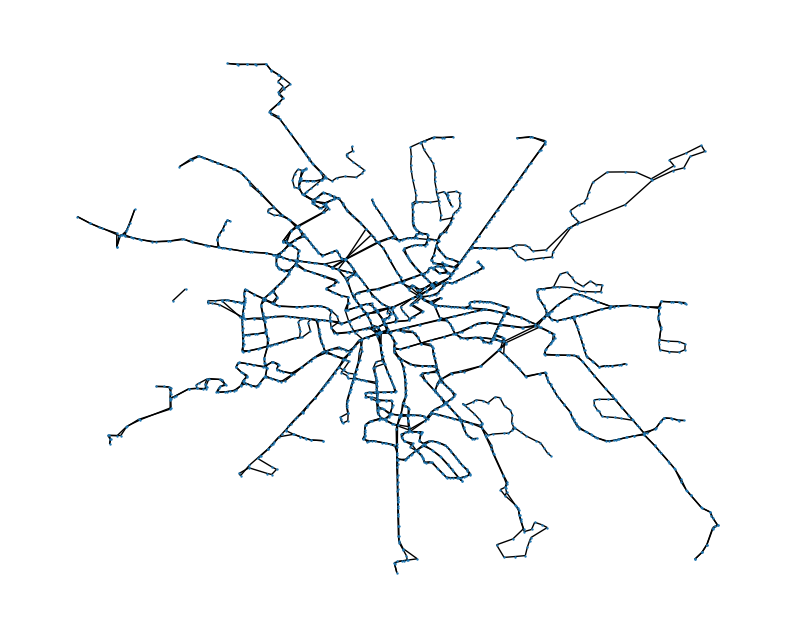

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
nx.draw(G, pos=points_dict, node_size=0.5, ax=ax)

# P8.6

Taking into account the time table data, obtain the temporal
network from the graphs from the previous task.

In [25]:
points_in_time  = {"0": {'100101'}}
time_limit = 10

In [26]:
def get_near_stops(point):
    result = set()
    lat, lon = points[point]['lat'], points[point]['lon']
    
    for node, time_needed in points[point]["routes"].items():
        if time_needed <= time_limit:
            result.add(node)
            
    return result

In [27]:
N = 50 # time steps

In [28]:
for i in range(1, N):
    points_in_time[str(i)] = (points_in_time[str(i - 1)]
                              .union(set([k for node in points_in_time[str(i - 1)] for k in get_near_stops(node)])))
    print(i,':', points_in_time[str(i)])

json.dump({k: list(v) for k, v in points_in_time.items()}, open(f'points_in_time_{N}.json', 'w'))

1 : {'100103', '100106', '102815', '102811', '200109', '200103', '100203', '123107', '200102', '100107', '100101', '200206', '103201', '100108', '100104', '100202', '103302', '100201', '102801', '100102', '200104', '123204', '200107', '123111', '100188', '123101', '200101', '102802', '200105', '102805', '123112', '123102', '102813', '290102', '123103', '200201', '200106', '103202'}
2 : {'106701', '239902', '200304', '100101', '100102', '123201', '106604', '156201', '123101', '200101', '105305', '200105', '123112', '123202', '200204', '700303', '106801', '212001', '123203', '123103', '200201', '290001', '200202', '200106', '106702', '103002', '200109', '156252', '103402', '200206', '102807', '100303', '103001', '102801', '211901', '200104', '123204', '212014', '105302', '130502', '200302', '102806', '123102', '700306', '102901', '105304', '105301', '100302', '100106', '102816', '102811', '200103', '100305', '212006', '100108', '103301', '100307', '100301', '105201', '123111', '100188', 

27 : {'119401', '135403', '150002', '307902', '290401', '709403', '104301', '313203', '128502', '327802', '306506', '601101', '308501', '231302', '520401', '328101', '602004', '115201', '300706', '307501', '242502', '411001', '605102', '241402', '507305', '110404', '605928', '701503', '133302', '202801', '123902', '218501', '101306', '600605', '501902', '226802', '320803', '403602', '190402', '414301', '202001', '322804', '327002', '601403', '401901', '304203', '203903', '210503', '124601', '197202', '508902', '409601', '306102', '508604', '102901', '602608', '403004', '213204', '101309', '509203', '600806', '207902', '609001', '108004', '415201', '329801', '491902', '131502', '245902', '515901', '590702', '602802', '404401', '213004', '105701', '600201', '113702', '107902', '212302', '125301', '205801', '607202', '305001', '323902', '316203', '237302', '213104', '400302', '241501', '329901', '108803', '702301', '107901', '312003', '111202', '200503', '607506', '149701', '185101', '700

41 : {'119401', '135403', '150002', '307902', '290401', '316907', '662701', '709403', '104301', '313203', '128502', '327802', '306506', '601101', '139801', '308501', '231302', '520401', '328101', '602004', '115201', '300706', '307501', '242502', '411001', '605102', '241402', '507305', '110404', '605928', '701503', '133302', '235101', '202801', '501702', '123902', '218501', '141202', '421002', '101306', '600605', '501902', '137102', '226802', '320803', '403602', '190402', '414301', '202001', '322804', '327002', '601403', '204501', '401901', '304203', '203903', '216001', '210503', '124601', '197202', '508902', '197102', '409601', '306102', '508604', '641101', '102901', '602608', '403004', '213204', '101309', '509203', '119004', '600806', '207902', '609001', '171002', '190702', '108004', '415201', '329801', '491902', '131502', '245902', '515901', '590702', '602802', '404401', '213004', '105701', '600201', '113702', '132401', '107902', '212302', '125301', '194001', '374801', '237602', '205

# P8.7

Make an animation of how traffic flows throughout the day.

In [29]:
G = nx.from_edgelist(edges)
points_in_time = json.load(open(f"points_in_time_{N}.json"))

<IPython.core.display.Javascript object>


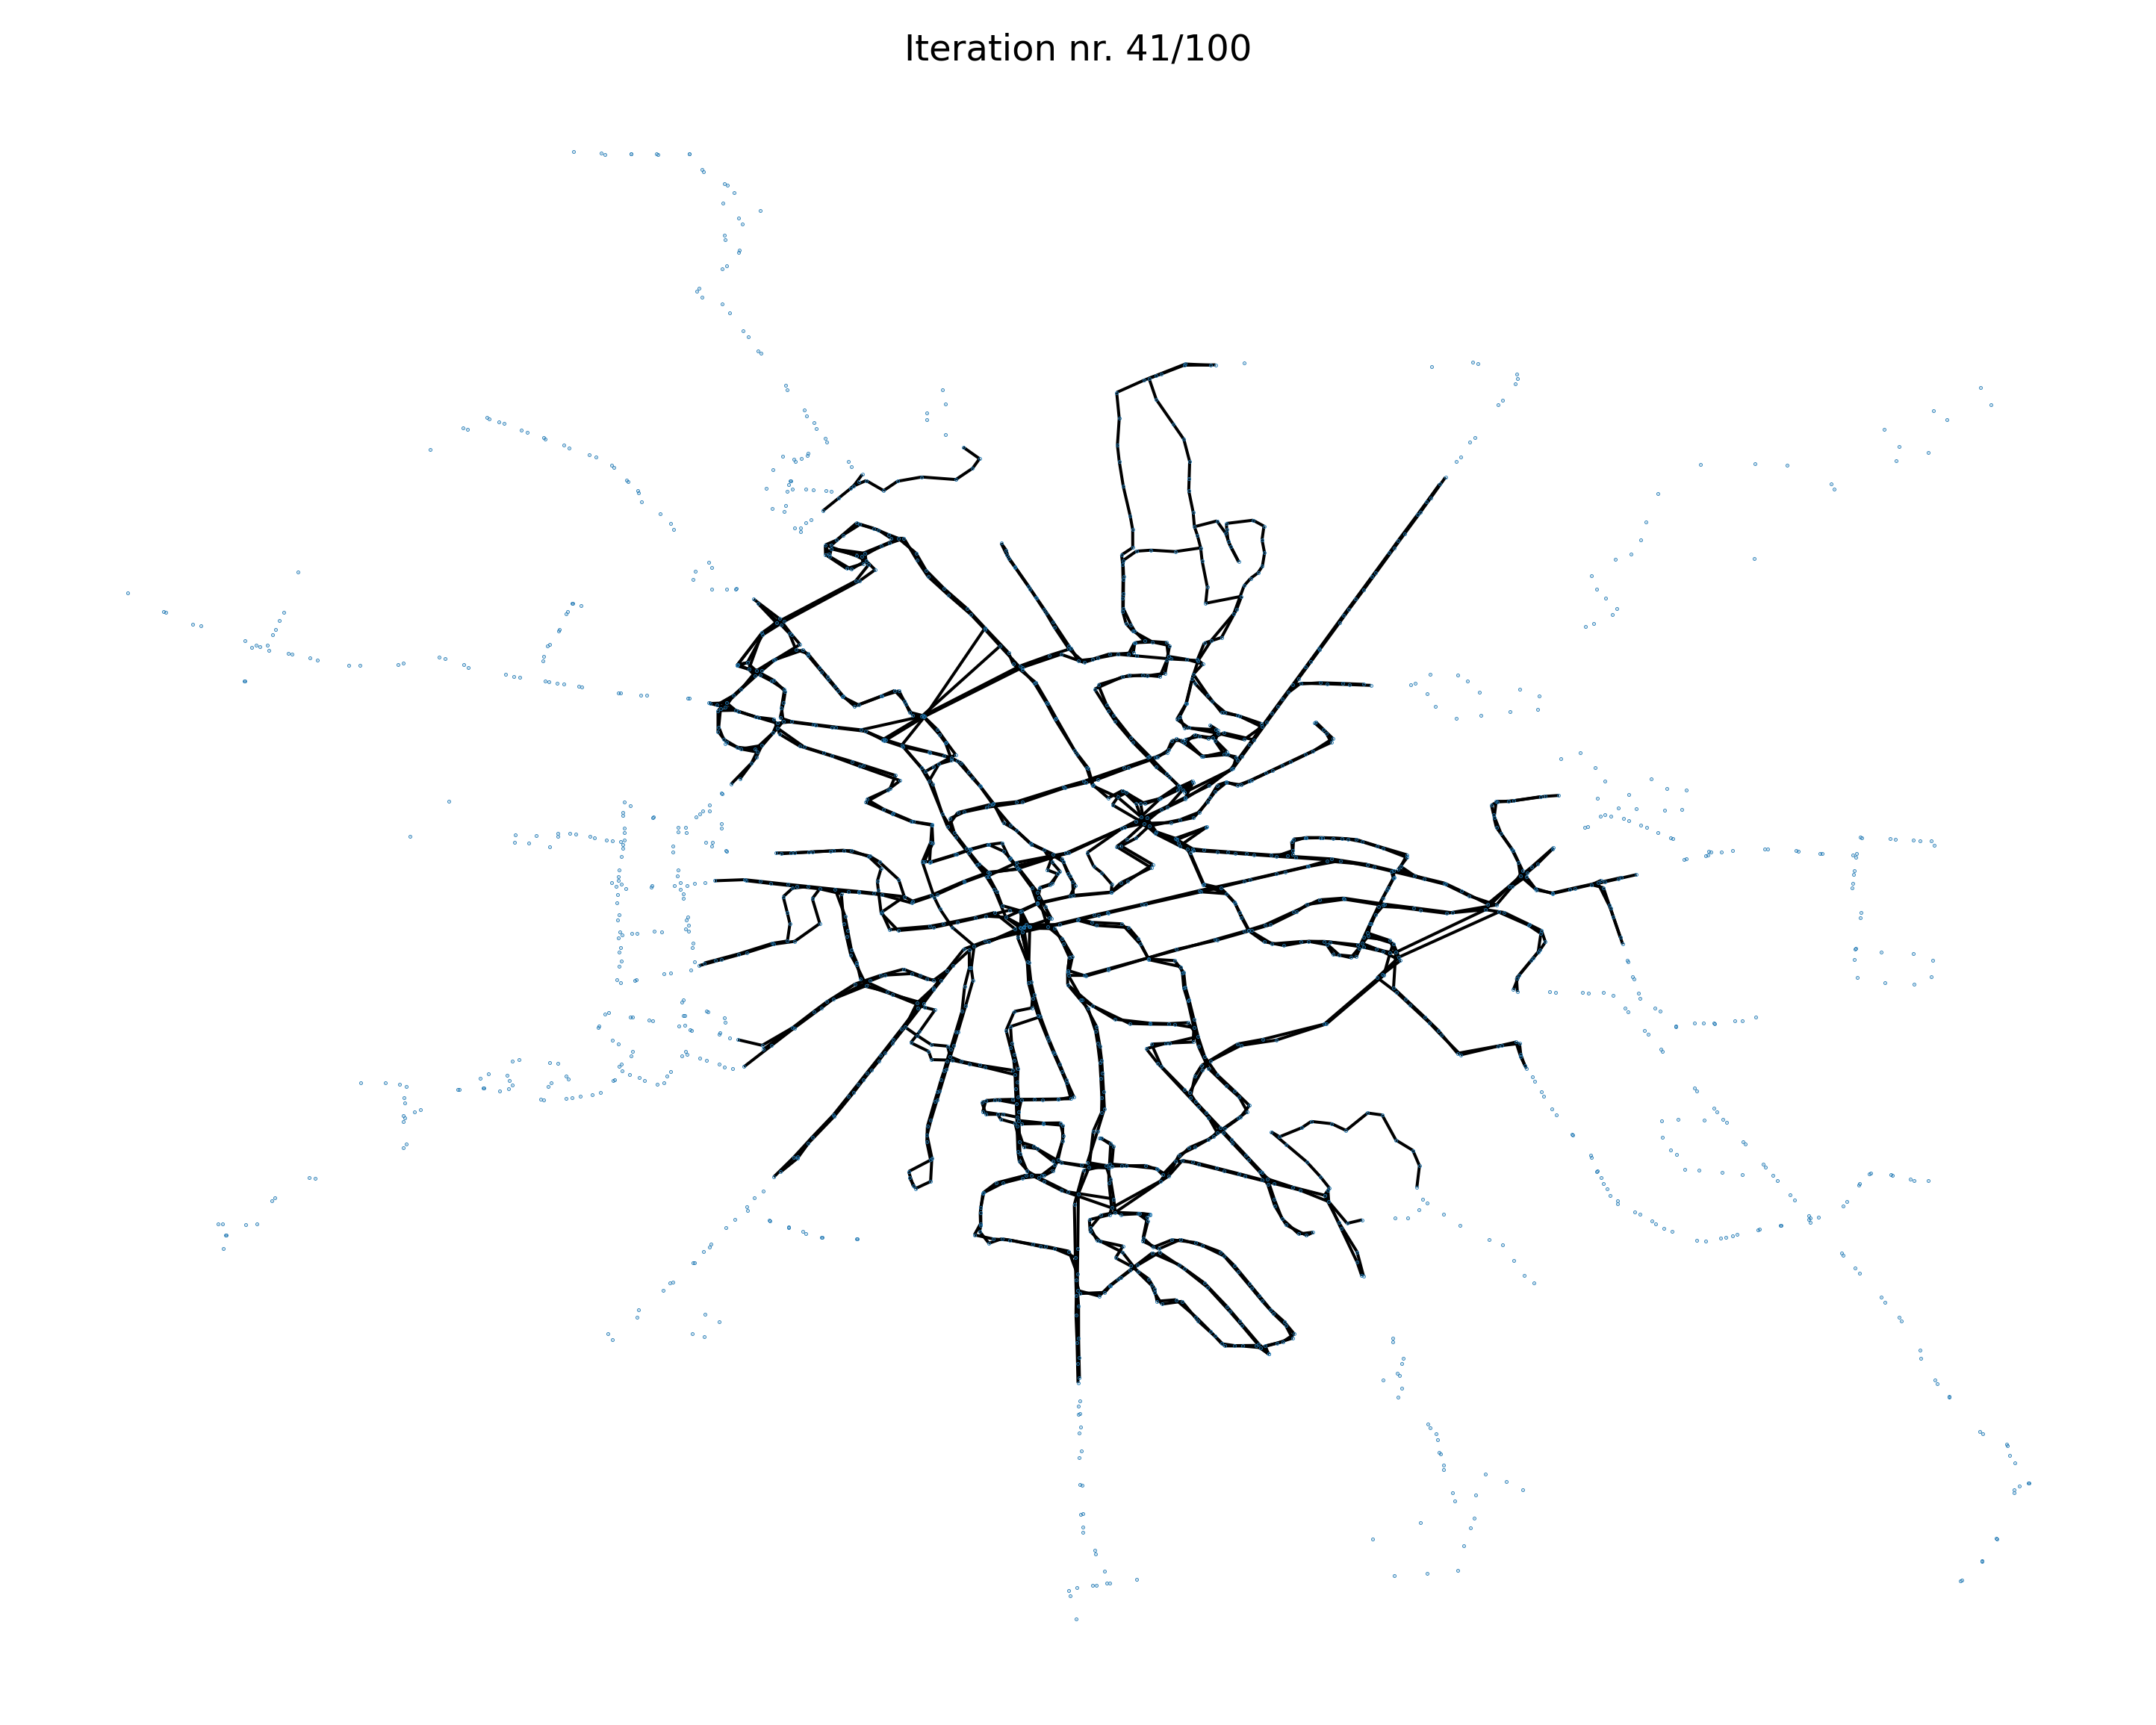

In [35]:
%matplotlib notebook
from copy import copy
from matplotlib.animation import FuncAnimation

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

stops_by_time = json.load(open(f"points_in_time_{N}.json"))
fig, ax = plt.subplots()   

def update(frame):
    try:
        ax.clear()
        G_plot = nx.Graph()
        G_plot.add_nodes_from(G.nodes)
        G_plot.add_edges_from( nx.subgraph(G, stops_by_time[str(int(frame))]).edges)
        nx.draw(G_plot, pos=points_dict, node_size =0.05, ax=ax)
        ax.set_title(f"Iteration nr. {round(frame*2)}/{N*2}")
    except Exception as e:
        print(e)
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, N), interval=200, blit=False)

# P8.8

In [32]:
def calculate_MLE(data):
    return 1 + len(data) / (np.sum(np.log(data / np.min(data) if np.min(data) >= 0 else 1)))

In [33]:
def calculate_metrics(G: nx.Graph, name: str, directed: bool):
    degree_sequence = sorted([d for _, d in G.degree()], reverse=True)
    return {
        'name': name,
        'directed': directed,
        'N': len(G.nodes),
        'E': len(G.edges),
        '<k>': np.mean(degree_sequence),
        'alpha': calculate_MLE(degree_sequence),
        'l': nx.average_shortest_path_length(nx.subgraph(G, max(nx.connected_components(G), key=len))),
        #'r': nx.degree_pearson_correlation_coefficient(G)
    }

In [34]:
pd.DataFrame([calculate_metrics(nx.subgraph(G, stops), i, True) for i, (_, stops) in enumerate(points_in_time.items())])    

/tmp/ipykernel_13470/356980065.py:2: RuntimeWarning: invalid value encountered in divide
  return 1 + len(data) / (np.sum(np.log(data / np.min(data) if np.min(data) >= 0 else 1)))
/tmp/ipykernel_13470/356980065.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1 + len(data) / (np.sum(np.log(data / np.min(data) if np.min(data) >= 0 else 1)))


,name,directed,N,E,<k>,alpha,l
0,0,True,1,0,0.000000,NaN,0.000000
1,1,True,15,11,1.466667,NaN,2.380952
2,2,True,45,44,1.955556,NaN,5.215924
3,3,True,79,89,2.253165,2.407723,6.865953
4,4,True,127,132,2.078740,NaN,8.527497
5,5,True,198,210,2.121212,2.468988,12.094066
6,6,True,255,268,2.101961,NaN,13.725917
7,7,True,329,358,2.176292,NaN,13.874834
8,8,True,402,446,2.218905,NaN,14.796637
9,9,True,500,560,2.240000,2.334173,16.383343
